In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### 1. Generate scatter points of water quality vs population density

In [2]:
county_full = pd.read_csv('county_full.csv')

In [3]:
pop_list = list(county_full['popu_density'])
tb_list = list(county_full['median_tb_Result'])
ph_list = list(county_full['median_ph_Result'])
oxy_list = list(county_full['median_oxy_Result'])
temp_list = list(county_full['median_temp_Result'])

In [4]:
def plotScatter(l1, l2, y_str, title_str, filename, log_scale = True):
    """
    This function plots scatter points.
    """
    
    title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'bold',
              'verticalalignment':'bottom'}
    
    axis_font = {'fontname':'Arial', 'size':'20', 'color':'black'}
    
    # plot 
    plt.rc('font', size=20)
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 7)

    plt.scatter(l1, l2, s=150, c='c', edgecolors='b')
    
    if log_scale:
        ax.set_xscale('log')
    
    ax.set_xlabel('Population Density (per square mile)', **axis_font)
    ax.set_ylabel(y_str, **axis_font)
    plt.title(title_str, **title_font)
    plt.savefig(filename)
    plt.show()

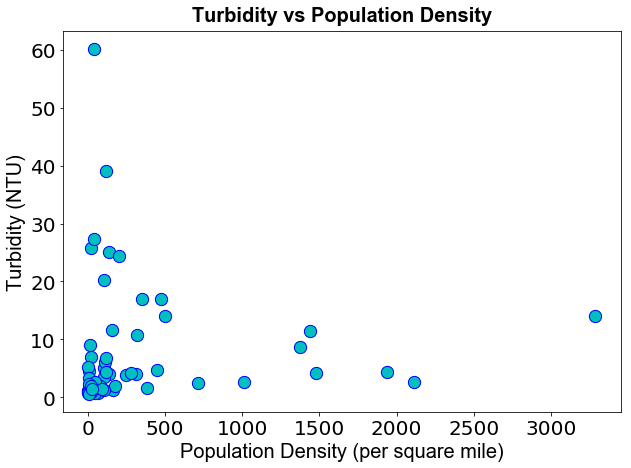

In [5]:
plotScatter(pop_list, tb_list, 'Turbidity (NTU)', 'Turbidity vs Population Density', 'TbvPd', log_scale=False)

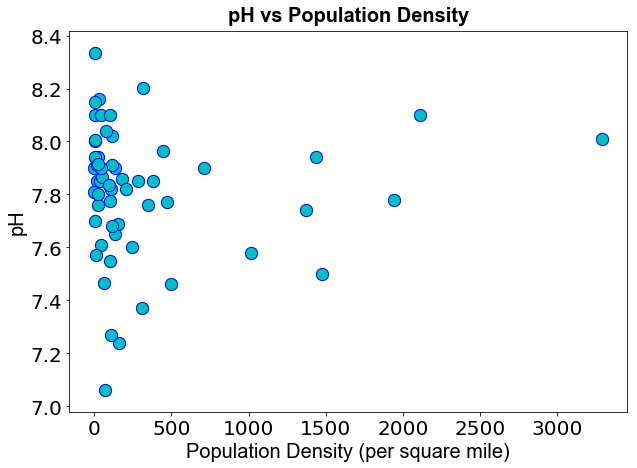

In [6]:
plotScatter(pop_list, ph_list, 'pH', 'pH vs Population Density', 'PhvPd', log_scale=False)

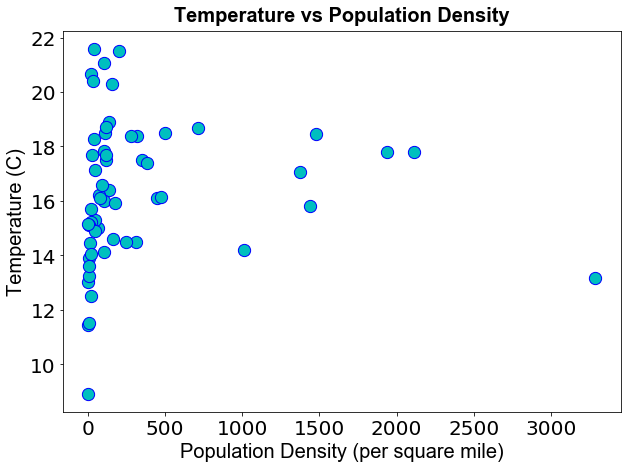

In [7]:
plotScatter(pop_list, temp_list, 'Temperature (C)', 'Temperature vs Population Density', 'TtvPd', log_scale=False)

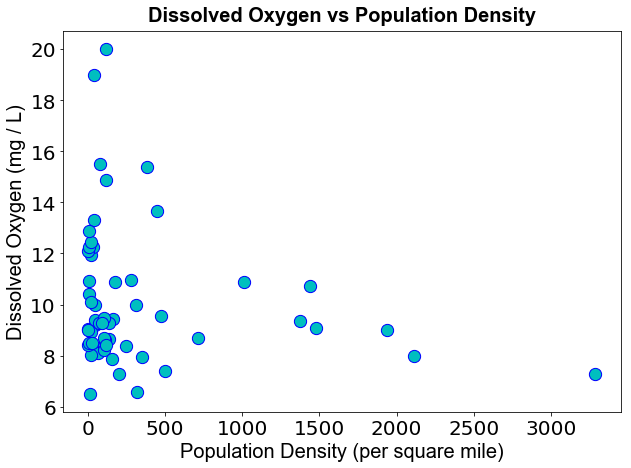

In [8]:
plotScatter(pop_list, oxy_list, 'Dissolved Oxygen (mg / L)', 'Dissolved Oxygen vs Population Density', 'DovPd', log_scale=False)

### 2. Calculate correlation between every two columns and draw a correlation map

In [9]:
# change column names
county_fullrn = county_full.rename(
    columns ={'popu_density': 'Population', 'median_oxy_Result': 'Oxygen', 
             'median_ph_Result': 'pH', 'median_temp_Result': 'Temperature', 
             'median_tb_Result': 'Turbidity'}, inplace=False)

In [10]:
# Compute the correlation matrix
county_woname = county_fullrn[[ 'Population', 'Oxygen', 'Turbidity', 'pH', 'Temperature']]
corr = county_woname.corr()

In [11]:
corr

,Population,Oxygen,Turbidity,pH,Temperature
Population,1.000000,-0.191720,0.010876,0.035718,0.035589
Oxygen,-0.191720,1.000000,0.127918,0.331214,-0.002412
Turbidity,0.010876,0.127918,1.000000,0.116890,0.517924
pH,0.035718,0.331214,0.116890,1.000000,-0.037873
Temperature,0.035589,-0.002412,0.517924,-0.037873,1.000000


In [12]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

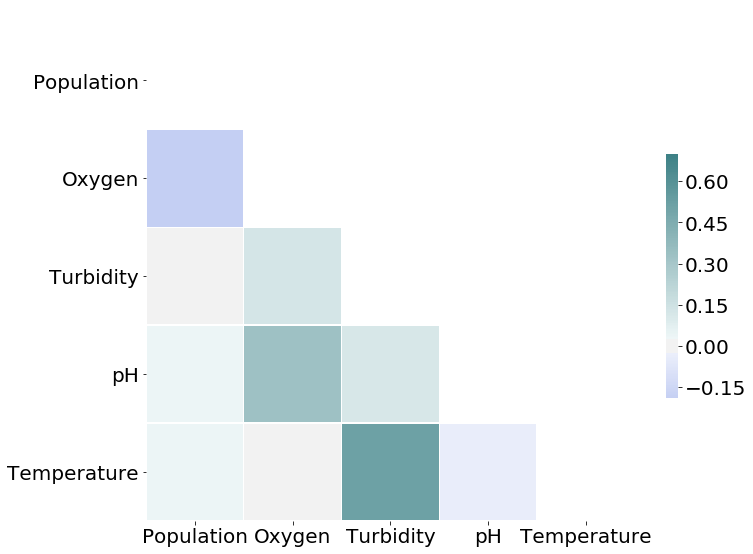

In [13]:
# Set up the matplotlib figure

f, ax = plt.subplots(figsize=(11, 9))

title_font = {'fontname':'Arial', 'size':'20', 'color':'white', 'weight':'normal',
          'verticalalignment':'bottom'}

# Generate a custom diverging colormap
cmap = sns.diverging_palette(-100, 200, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('correlation between population and water quality indicators', **title_font)
plt.savefig('corr.png')